# Pacotes

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
import warnings # Serve para ignorar mensagens de alerta que aparecem 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 20,
    'lines.linewidth' : 1.5,
    'lines.markersize' : 10,
    'figure.figsize': (8,5),
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'legend.fontsize':12,
    'axes.labelsize':18
})

# Importing Kuramoto dataset

We first import the solution obtained from the Kuramoto differential equation subject to periodic boundary conditions. The spatial domain has length L=200 and discretized with 256 nodes. The time step was 0.25 s with a time domain from t=0 to t=2000 s.


$$ u_t + u_x u + u_{xx} + u_{xxxx}=0 \tag{1} $$ 


$$ u(t=0,x) = cos \frac{\pi x}{20}*(1+sin\frac{\pi x}{20}) $$

The first 200 seconds were truncated in order to view the more chaotic part of the solution

In [16]:
X = np.load('Kuramoto_dataset/Kuramoto_X.npy')
T = np.load('Kuramoto_dataset/Kuramoto_T.npy')
U = np.load('Kuramoto_dataset/Kuramoto_U.npy')

In [17]:
X.shape

(40001, 256)

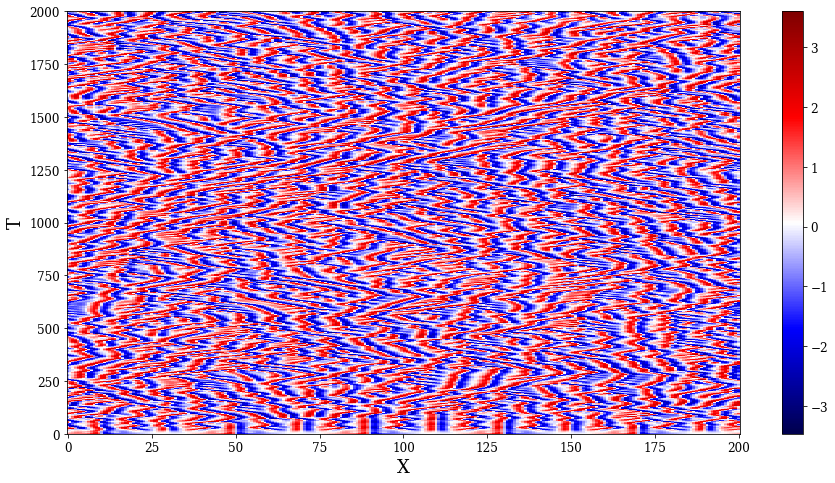

In [18]:
fig, ax = plt.subplots(figsize=(13, 7))

surf = plt.pcolor(X,T,U,cmap='seismic',shading='auto')

fig.colorbar(surf)
plt.xlabel('X')
plt.ylabel('T')
plt.tight_layout()

In [19]:
# Taking out the first 200 seconds of data

X = X[4000:]
T = T[4000:]
U = U[4000:]

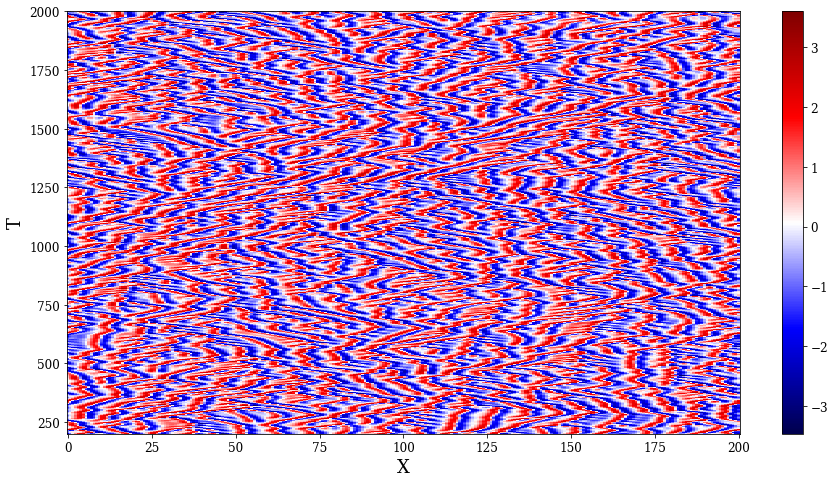

In [21]:
fig, ax = plt.subplots(figsize=(13, 7))

surf = plt.pcolor(X,T,U,cmap='seismic',shading='auto')

fig.colorbar(surf)
plt.xlabel('X')
plt.ylabel('T')
plt.tight_layout()

# PINN

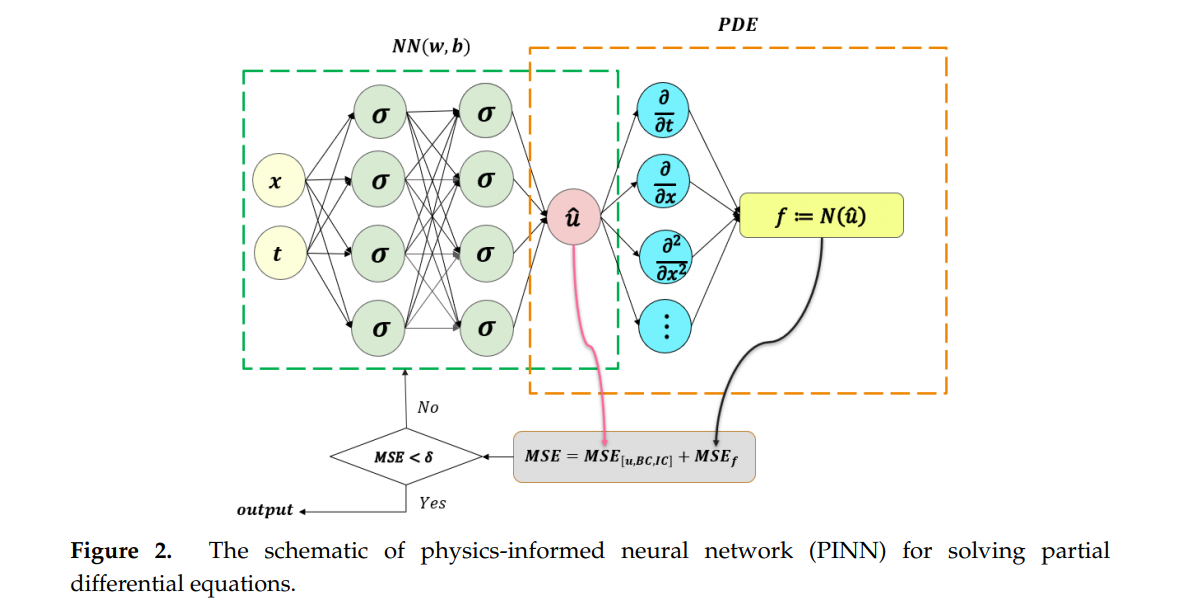

Rewritting the Kuramoto equation:


$$ u_t + u_x u + u_{xx} + u_{xxxx}=0 \tag{3} $$

The neural network will try to find a mapping between the independent variables (**x** and **t** in figure 2) and the approximate solution of the differential equation **u**. This approximation will undergoe automatic differentiation to obtain the expression **f** that is equal to the differential equation we would like to solve. In this case:

$$ f := u_t + u_x u + u_{xx} + u_{xxxx} \tag{4}$$

There will be a neural network MSE (left side) and a differential equation MSE (right side)

The shared parameters between the neural network u(t,x) and residual equation f(t,x) can be learned by minimizing the mean squared error loss below:


$$ MSE = MSE_u + MSE_f \tag{5} $$


Where

- $MSE_u:$ = Error associated with the training data on **u(t,x)** 
- $MSE_u:$ = Error associated by imforcing the structure of equation **f** at a finite set of collocation points, whose number and location is taken from the same training data.

By definition of **f**, $MSE_u$ should be zero, which indicates there is no residual.

## Sampling - initial and boundary conditions



In [20]:
# Solve the neural network model.
model.solve(x_true, y_true, epochs=32, batches=10)


NameError: name 'model' is not defined